In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from datetime import time, date
from scipy.stats import pearsonr


In [2]:
pd.options.display.max_columns = 40

In [3]:
df_2007 = pd.read_csv("dataverse_files/2007.csv")
df_2006 = pd.read_csv("dataverse_files/2006.csv")

In [4]:
plane_data = pd.read_csv("dataverse_files/plane-data.csv")

In [5]:
df = pd.concat([df_2006, df_2007])

In [6]:
df = df.drop("CancellationCode", axis=1)

In [7]:
df = df.merge(plane_data, left_on="TailNum", right_on="tailnum")

In [8]:
df = df.dropna()

In [9]:
df = df.astype({"year":"int"})

In [10]:
df["year"].unique()

array([1999, 1997, 1990, 2000, 1989, 2001, 1998, 2005, 1987, 1988, 2002,
       1986, 1984, 1995, 1996, 1985, 2003, 2004, 1992, 1994, 1991, 1993,
       1966,    0, 2006, 1957, 1976, 1969, 1975, 1968, 1977, 1967, 1971,
       1979, 1978, 1980, 1970, 1973, 1972, 1956, 2007, 1974, 1963, 1983,
       1982, 1959, 1964, 1962, 1965])

In [11]:
df.drop(df[df.year == 0].index, inplace=True)


In [12]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,0,0,0,0,0,0,N657AW,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
1,2006,1,11,3,1913.0,1912,2326.0,2331,US,9,N657AW,193.0,199.0,172.0,-5.0,1.0,PHX,ORD,1440,5,16,0,0,0,0,0,0,0,N657AW,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
2,2006,1,12,4,2355.0,2359,121.0,131,US,374,N657AW,86.0,92.0,58.0,-10.0,-4.0,LAS,OAK,407,5,23,0,0,0,0,0,0,0,N657AW,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
3,2006,1,12,4,724.0,729,1017.0,1019,US,182,N657AW,233.0,230.0,200.0,-2.0,-5.0,ORD,PHX,1440,24,9,0,0,0,0,0,0,0,N657AW,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
4,2006,1,12,4,1305.0,1300,1848.0,1850,US,570,N657AW,223.0,230.0,207.0,-2.0,5.0,PHX,TPA,1788,5,11,0,0,0,0,0,0,0,N657AW,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999


In [15]:
corr_coef, p_value = pearsonr(df["ArrDelay"], df["year"])
corr_coef, p_value

(-0.0077044061099451775, 2.9289722413220696e-151)

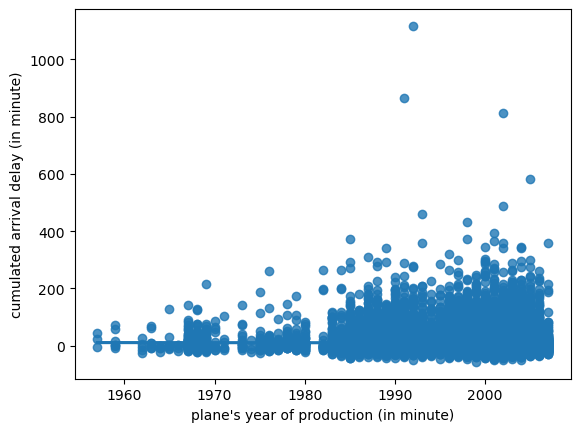

,ArrDelay,year
count,20000.000000,20000.000000
mean,9.797150,1996.959350
std,38.468265,7.295181
min,-57.000000,1957.000000
25%,-9.000000,1992.000000
50%,-1.000000,1999.000000
75%,14.000000,2002.000000
max,1117.000000,2007.000000


In [14]:
sample = df[['ArrDelay', 'year']].iloc[np.random.randint(0, len(df), 20000)]

sns.regplot(data=sample, x='year', y='ArrDelay')
plt.xlabel("plane's year of production (in minute)")
plt.ylabel("cumulated arrival delay (in minute)")

plt.savefig("old_plane_correlation.png")
plt.show()
sample.describe()